## Flight Price Prediction

Dataset: https://www.kaggle.com/datasets/shubhambathwal/flight-price-prediction

# Introduction

Industri penerbangan sangat dinamis, dengan harga tiket yang fluktuatif berdasarkan berbagai faktor seperti waktu pemesanan, waktu keberangkatan, dan rute penerbangan. Penumpang sering menghadapi tantangan dalam memahami waktu optimal untuk membeli tiket guna mendapatkan harga terbaik. Untuk mengatasi masalah ini, dapat dilakukan pemodelan Machine Learning untuk memberikan prediksi harga tiket penerbangan untuk memberikan wawasan kepada calon penumpang mengenai potensi perubahan harga.

# Dataset Overview



1.   `airline` : Nama perusahaan maskapai tersimpan dalam kolom maskapai. Ini adalah categorical feature dengan 6 maskapai yang berbeda.
2.   `flight` : Penerbangan menyimpan informasi mengenai kode penerbangan pesawat. Ini adalah categorical feature.
3.   `source_city` : Kota dari mana penerbangan berangkat. Ini adalah categorical feature dengan unique 6 kota.
4.   `departure_time` : aktu keberangkatan dan memiliki unique 6 label waktu
5.   `stops` : Sebuah categorical feature dengan 3 nilai berbeda yang menyimpan jumlah transit antara kota asal dan tujuan.
6.   `arrival_time` : Memiliki enam label waktu yang berbeda dan menyimpan informasi tentang waktu kedatangan.
7.   `destination_city` : Kota tempat penerbangan akan mendarat. Ini adalah categorical feature dengan unique 6 kota.
8.   `class` : Categorical feature yang berisi informasi tentang kelas kursi; memiliki dua nilai berbeda: Bisnis dan Ekonomi.
9.   `duration` : Total waktu yang dibutuhkan untuk bepergian antara kota-kota dalam jam.
10.  `days_left` : Pengurangan tanggal perjalanan dari tanggal pemesanan.
11.  `price` : Harga tiket.

# Load Dataset

##Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
dataset = pd.read_csv('/content/drive/MyDrive/TUGAS DIBIMBING/FINAL PROJECT/flight.csv')
dataset.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [ ]:
drop_columns = ["Unnamed: 0", "flight"]
df = dataset.copy().drop(drop_columns, axis=1)

**Note**:

Disini tidak diperlukan column `unnamed`, jadi akan di-drop saja.

In [ ]:
df.head()

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [ ]:
df.tail()

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
300148,Vistara,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,Vistara,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,Vistara,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,Vistara,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585
300152,Vistara,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,81585


# Data Understanding

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   source_city       300153 non-null  object 
 2   departure_time    300153 non-null  object 
 3   stops             300153 non-null  object 
 4   arrival_time      300153 non-null  object 
 5   destination_city  300153 non-null  object 
 6   class             300153 non-null  object 
 7   duration          300153 non-null  float64
 8   days_left         300153 non-null  int64  
 9   price             300153 non-null  int64  
dtypes: float64(1), int64(2), object(7)
memory usage: 22.9+ MB


# Data Preparation

In [ ]:
df.shape

(300153, 10)

Terdapat 300153 rows dengan 11 columns.

In [ ]:
df.describe()

,duration,days_left,price
count,300153.000000,300153.000000,300153.000000
mean,12.221021,26.004751,20889.660523
std,7.191997,13.561004,22697.767366
min,0.830000,1.000000,1105.000000
25%,6.830000,15.000000,4783.000000
50%,11.250000,26.000000,7425.000000
75%,16.170000,38.000000,42521.000000
max,49.830000,49.000000,123071.000000


## Missing Value

In [ ]:
df.isna().sum()

airline             0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

## Duplicate Data

In [ ]:
df.duplicated().sum()

2213

**Observasi**:

Tidak ada missing value dan duplikat data pada dataset.

# Statistical Summary

In [ ]:
categorical_columns = df.select_dtypes(include=['object']).columns
numerical_columns = df.select_dtypes(include=['int', 'float']).columns

## Data Numerical

In [ ]:
for col in numerical_columns:
    print(f'Values {col} :')
    print(df[col].value_counts(), '\n')

Values duration :
2.17     4242
2.25     4036
2.75     2879
2.08     2755
2.83     2323
         ... 
37.17       1
38.75       1
38.50       1
36.25       1
41.50       1
Name: duration, Length: 476, dtype: int64 

Values days_left :
25    6633
18    6602
39    6593
32    6585
26    6573
24    6542
19    6537
31    6534
33    6532
40    6531
41    6525
28    6522
38    6512
20    6502
30    6501
42    6497
22    6494
36    6490
21    6479
37    6476
43    6472
44    6436
17    6419
11    6417
34    6412
13    6404
23    6401
29    6397
12    6381
27    6360
14    6349
15    6340
45    6314
35    6291
16    6272
46    6160
49    6154
48    6078
47    6069
10    5822
8     5767
6     5740
7     5703
9     5665
5     5392
4     5077
3     4248
2     4026
1     1927
Name: days_left, dtype: int64 

Values price :
54608    1445
2339     1442
54684    1390
60978    1383
60508    1230
         ... 
12014       1
26912       1
20145       1
25462       1
7533        1
Name: price, Length: 1215

Observasi:

Pada data numerical ini terdapat 3 variabel yang diperhatikan, dimana diantaranya adalah :

1. Pada variabel `duration` memiliki 476 unique values.
2. Pada variabel `days_left` memiliki 49 unique values.
3. Pada variabel `price` memiliki 12157 unique values.

In [ ]:
df[numerical_columns].describe().T

,count,mean,std,min,25%,50%,75%,max
duration,300153.0,12.221021,7.191997,0.83,6.83,11.25,16.17,49.83
days_left,300153.0,26.004751,13.561004,1.00,15.00,26.00,38.00,49.00
price,300153.0,20889.660523,22697.767366,1105.00,4783.00,7425.00,42521.00,123071.00


**Observasi** :

1. Dapat dilihat pada variabel `duration` dan `days_left` dimana mean dan mediannya tidak terlalu jauh berbeda yang mengindikasikan cenderung simetris atau normal. Namun dengan variabel `price` yang mana mean jauh lebih besar dibanding dengan median, kemungkinan akan positive skewed atau right skewed.

2. Kemudian jika diperhatikan nilai maksimal pada variabel `duration` dan `price` sangat jauh berbeda dengan quantile 3 yang mana bisa mengindikasikan nilai ekstrem atau outlier.

## Data Categorical

In [ ]:
for col in categorical_columns:
    unique_values = df[col].value_counts()
    print(f"Values {col} :\n{unique_values}\n")

Values airline :
Vistara      127859
Air_India     80892
Indigo        43120
GO_FIRST      23173
AirAsia       16098
SpiceJet       9011
Name: airline, dtype: int64

Values source_city :
Delhi        61343
Mumbai       60896
Bangalore    52061
Kolkata      46347
Hyderabad    40806
Chennai      38700
Name: source_city, dtype: int64

Values departure_time :
Morning          71146
Early_Morning    66790
Evening          65102
Night            48015
Afternoon        47794
Late_Night        1306
Name: departure_time, dtype: int64

Values stops :
one            250863
zero            36004
two_or_more     13286
Name: stops, dtype: int64

Values arrival_time :
Night            91538
Evening          78323
Morning          62735
Afternoon        38139
Early_Morning    15417
Late_Night       14001
Name: arrival_time, dtype: int64

Values destination_city :
Mumbai       59097
Delhi        57360
Bangalore    51068
Kolkata      49534
Hyderabad    42726
Chennai      40368
Name: destination_city, dt

**Observasi**:

Dapat dilihat bahwa,

1. Pada variabel `airline` terdapat 6 maskapai yaitu `Vistara`, `Air_India`, `Indigo`, `GO_FIRST`, `AirAsia`, dan `SpiceJet`.
2. Pada variabel `flight` yang merupakan kode penerbangan pesawat terdapat 1561 unique values.
3. Pada variabel `source_city` dan `destination_city` terdapat 6 unique values yaitu `Delhi`, `Mumbai`, `Bangalore`, `Kolkata`, `Hyderabad`, dan `Chennai`.
4. Pada variabel `departure_time`dan `arrival_time` terdapat 6 unique values yaitu `Morning`, `Early_Morning`, `Evening`, `Night`, `Afternoon`, dan `Late_Night`.
5. Pada variabel `class` terdapat 2 unique values yaitu, `Economy` dan `Business`.

In [ ]:
df[categorical_columns].describe().T

,count,unique,top,freq
airline,300153,6,Vistara,127859
source_city,300153,6,Delhi,61343
departure_time,300153,6,Morning,71146
stops,300153,3,one,250863
arrival_time,300153,6,Night,91538
destination_city,300153,6,Mumbai,59097
class,300153,2,Economy,206666


**Observasi**:

Dapat dilihat bahwa maskapai yang paling banyak muncul dalam dataset ini adalah Vistara dengan class yang paling banyak adalah Economy.

# Exploratory Data Analysis

## Univariate Analysis

### Distribusi Data Numerik

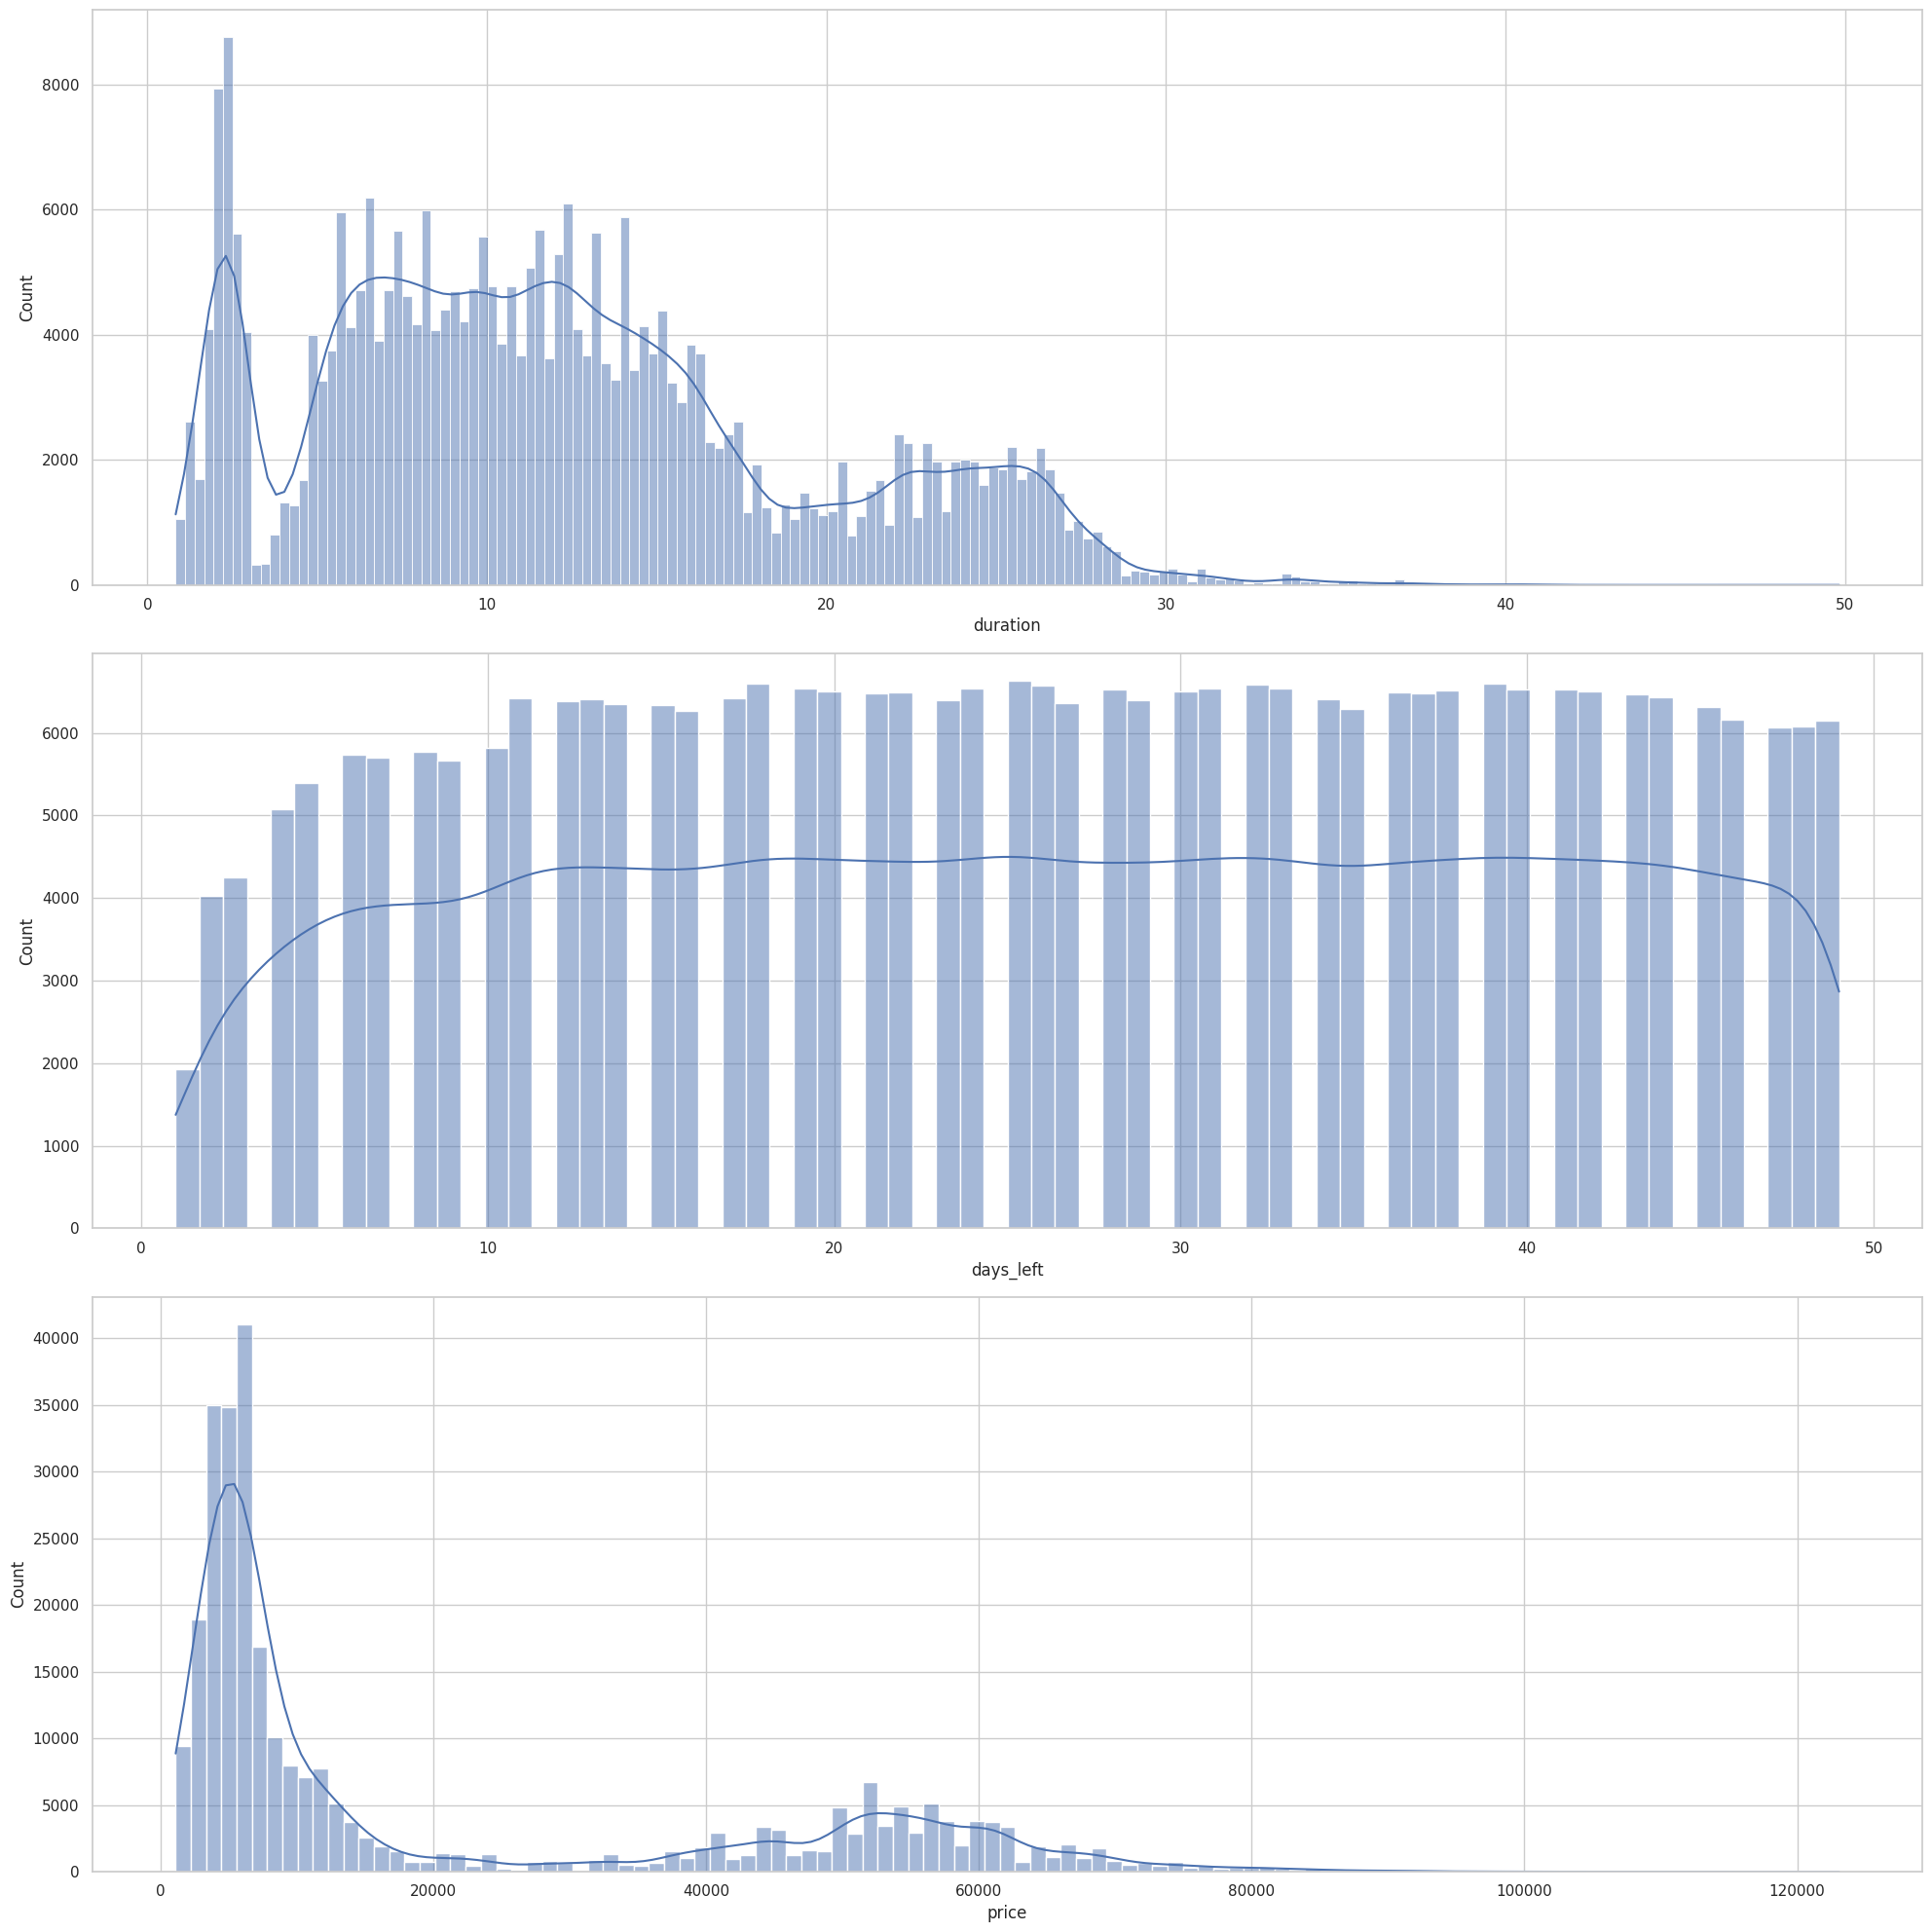

In [ ]:
plt.figure(figsize=(20, 20))

for i in range(0, len(numerical_columns)):
    plt.subplot(3, 1, i+1)
    sns.histplot(data=df, x=numerical_columns[i], kde=True)
    plt.xlabel(numerical_columns[i])
    plt.tight_layout()

plt.show()

**Observasi:**

1. Dapat dilihat pada plot variabel `duration` dimana plot tersebut membentuk distribusi bimodal dengan 2 puncak yang hampir menuju 6000.Selain dapat dilihat juga bahwa jumlah penumpang berkurang seiring dengan bertambahnya durasi perjalanan.
2. Pada variabel `days_left` dapat dilihat bahwa plot grafik cenderung datar dimana ini mengindikasikan distribusi normal yang mengenai >4000. Selain itu dapat dilihat juga bahwa penumpang cenderung booking ticket dari 10 - 50 hari sebelumnya.
3. Kemudian pada variabel `price` dapat dilihat pada plot grafiknya yang mengindikasikan positive skewed dengan puncak <30000.

### Distribusi Data Categorical

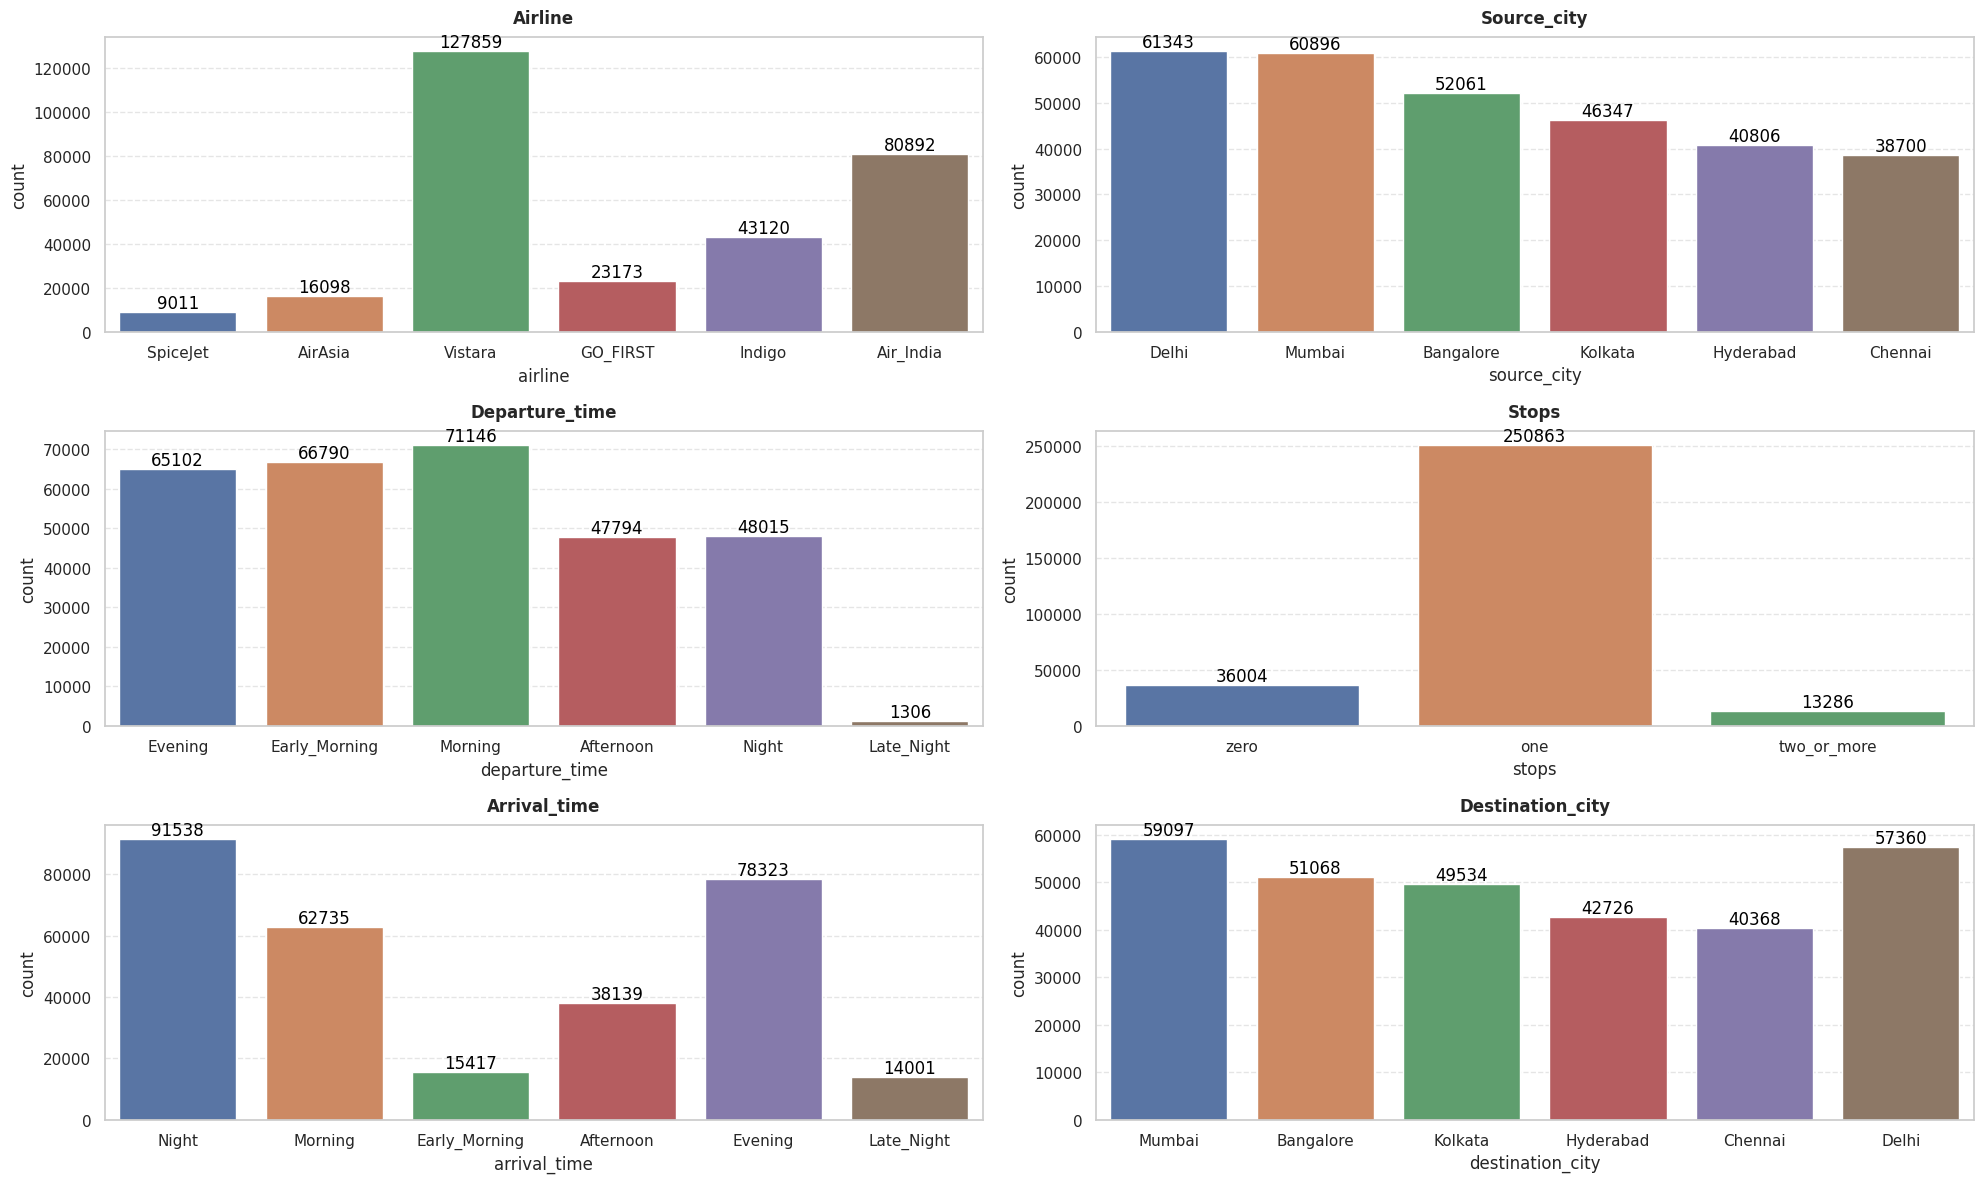

In [ ]:
features = [col for col in df.columns if col != 'flight' and df[col].dtype == 'O']

# Ambil subset 6 variabel pertama
plot_cats = features[:6]

plt.figure(figsize=(20, 12))
for i in range(0, len(plot_cats)):
    plt.subplot(3, 2, i + 1)  # Ubah ke 2 baris, 3 kolom
    ax = sns.countplot(x=df[plot_cats[i]])
    ax.bar_label(ax.containers[0], color="black")
    ax.set_title(f'{plot_cats[i].capitalize()}', fontdict={'fontweight': 'bold'}, pad=10)
    plt.grid(axis='y', linestyle="dashed", alpha=0.5)
    plt.tight_layout()

plt.show()

**Observasi:**

Melalui plot ini dapat dilihat bahwa:

1. Maskapai penerbangan yang paling banyak digunakan adalah Vistara. Perbedaan yang jauh signifikan dibandingkan dengan 5 maskapai lainnya.
2. Dapat dilihat juga pada `source_city` dan `destination_city` dimana Mumbai dan Delhi adalah asal kota penerbangan dan tujuan penerbangan terbanyak.
3. Kemudian pada `departure_time` yang mana waktu keberangkatan pada Morning dan Early Morning, sementara sebaliknya pada `arrival_time` yaitu Night dan Evening. Dapat diperhatikan juga pada distribusi data numerik bahwa rata-rata durasi yang ditempuh adalah kurang lebih 10 jam dan mungkin akan ditambah dengan waktu transit sehingga masuk akal ketika frekuensi `departure_time` palinga banyak pada Morning dan Early Morning dan `arrival_time`pada Night dan Evening.
4. Sementara pada `stops` yaitu jumlah transit yang paling banyak adalah satu kali.

## Bivariate Analysis

### Correlation between Number of Transits (Stops) and Price

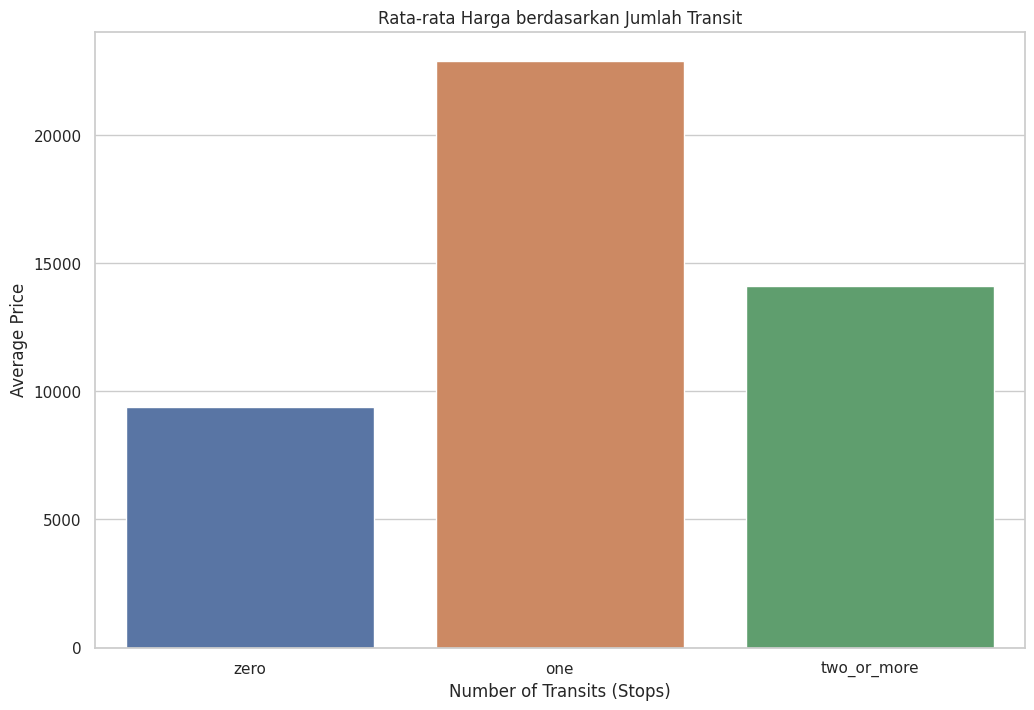

In [ ]:
plt.figure(figsize=(12, 8))
sns.barplot(data=df, x='stops', y='price', ci=None, estimator=np.mean)
plt.title('Rata-rata Harga berdasarkan Jumlah Transit')
plt.xlabel('Number of Transits (Stops)')
plt.ylabel('Average Price')
plt.show()

**Observasi :**

Berdasarkan hasil plot distribusi diatas dapat dilihat bahwa:

1. One Stop (transit) adalah yang lebih tinggi terdapat korelasi positif antara jumlah transit satu (one stop) dan harga. Artinya, ketika jumlah transit satu meningkat, harga cenderung lebih tinggi. Hal ini bisa disebabkan oleh kenyamanan dan kecepatan perjalanan yang lebih baik dengan satu transit.
2. Kemudian disusul dengan Two or More Stop (transit) yang mana kemungkinan ada peningkatan harga yang lebih besar dengan penambahan transit tambahan. Ini bisa terkait dengan kompleksitas perjalanan dan waktu yang lebih lama.

### Correlation between Departure Time and Price

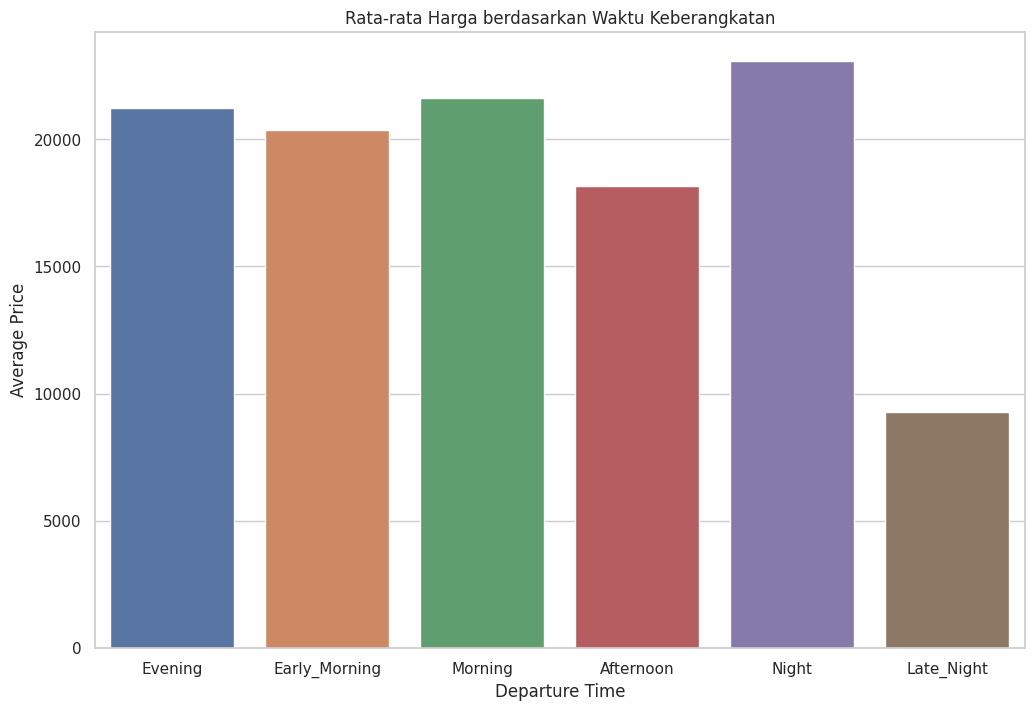

In [ ]:
plt.figure(figsize=(12, 8))
sns.barplot(data=df, x='departure_time', y='price', ci=None, estimator=np.mean)
plt.title('Rata-rata Harga berdasarkan Waktu Keberangkatan')
plt.xlabel('Departure Time')
plt.ylabel('Average Price')
plt.show()

**Observasi**

Berdasarkan plot distribusi korelasi `departure_time` dengan `price` dapat dilihat bahwa `departure_time` pada Night lebih tinggi rata-rata harganya, kemudian disusul dengan yang kedua adalah Morning dan yang ketiga adalah Evening dimana tidak jauh berbeda, dan Early_Morning.

Rata-rata harga yang tinggi pada waktu keberangkatan pada malam hari bisa saja disebabkan seperti permintaan yang tinggi pada penerbangan malam atau adanya kenyamanan tambahan yang disediakan pada waktu ini.

###Correlation between Duration and Price

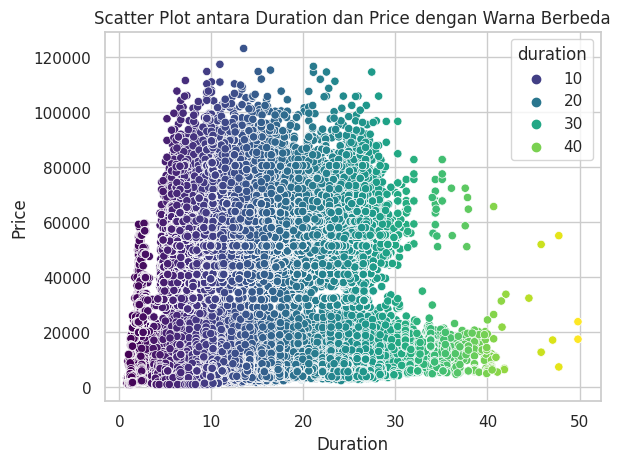

In [ ]:
sns.scatterplot(x='duration', y='price', hue='duration', data=df, palette='viridis')
plt.title('Scatter Plot antara Duration dan Price dengan Warna Berbeda')
plt.xlabel('Duration')
plt.ylabel('Price')
plt.show()

**Observasi**

Dari plot distribusi diatas dapat dilihat bahwa di dapatkan bahwa dari `duration` range 4 - 11 merupakan harga yang tertinggi mencapai 120000, kemudian dari range `duration` 12 - 30 mulai menurun dimana angka penurunan sangat jelas pada `duration` range 20. kemudian pada `duration` range 30 - 50 menempati harga terendah.

Penerbangan dengan duration singkat tetapi harga tinggi mungkin menunjukkan pilihan untuk pelanggan yang memiliki kebutuhan mendesak atau yang memprioritaskan waktu, dapat dipengaruhi dengan `class` dan jenis `airline` yang memiliki rata-rata harga tinggi.

# Multivariate Analysis

### Analyzed Price based on Airlines and Their Class.

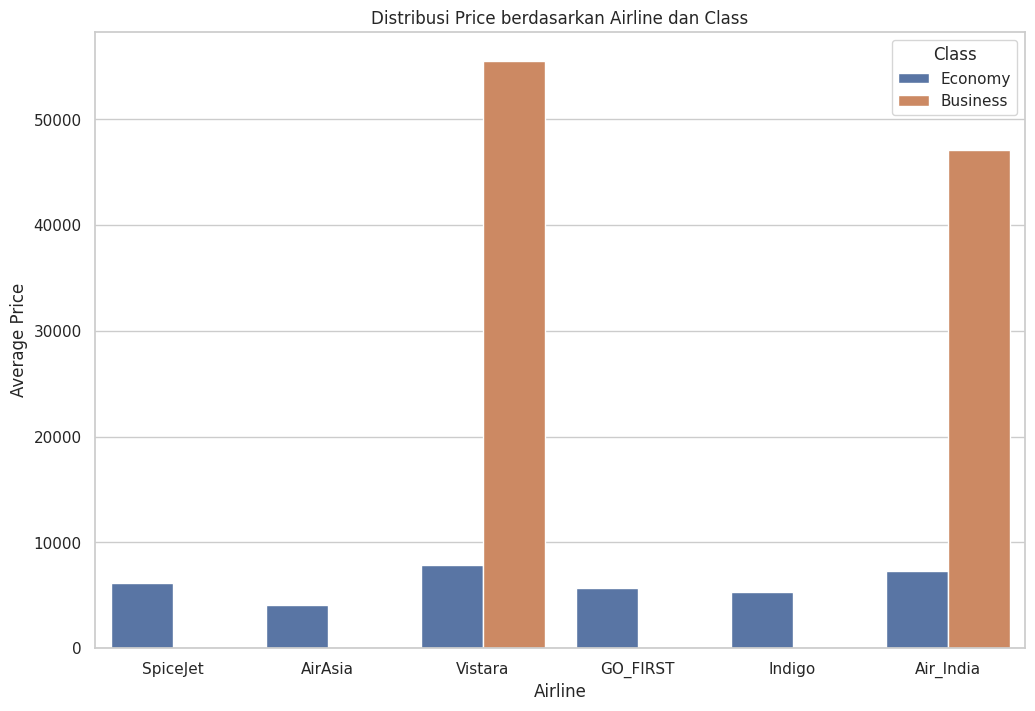

In [ ]:
airline_column = 'airline'
price_column = 'price'
class_column = 'class'

plt.figure(figsize=(12, 8))
sns.barplot(data=df, x=airline_column, y=price_column, hue=class_column, ci=None, estimator=np.mean)
plt.title('Distribusi Price berdasarkan Airline dan Class')
plt.xlabel('Airline')
plt.ylabel('Average Price')
plt.legend(title='Class', loc='upper right')
plt.show()

**Observasi:**

Analisa harga berdasarkan maskapai dan jenis kelasnya dapat dilihat bahwa:

Rata-rata harga tiket kelas Business dari maskapai Vistara lebih tinggi daripada rata-rata harga tiket kelas Business dari maskapai Air_India seperti yang tertampil pada plot. Bahkan rata-rata harga tiket Business sangat jauh berbeda dengan rata-rata harga tiket Ekonomi baik dari maskapai Vistara dan Air_India juga maskapai-maskapai lainnya. Dapat dilihat juga bahwa hanya ada Vistara dan Air_India yang memiliki class Business.

### Analyzed Price based on Source City and Destination City.

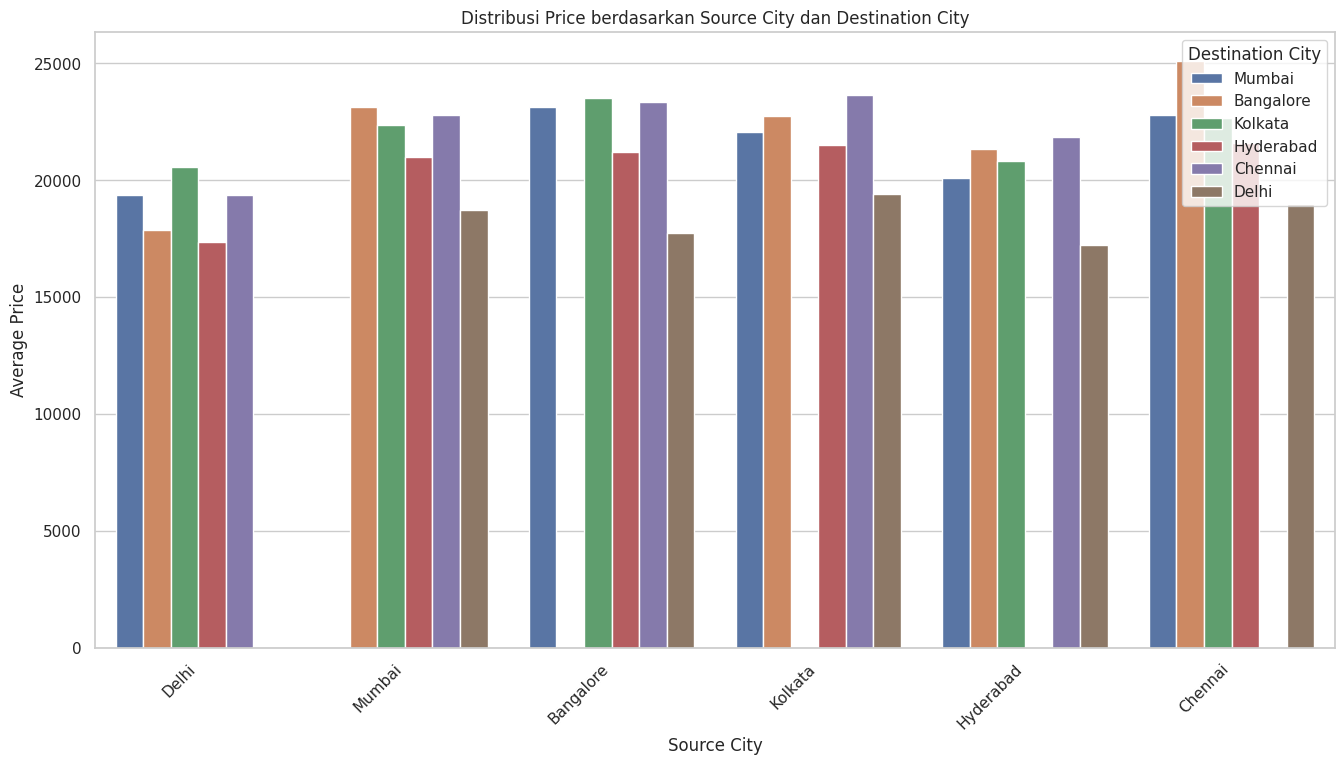

In [ ]:
plt.figure(figsize=(16, 8))
sns.barplot(data=df, x='source_city', y='price', hue='destination_city', ci=None, estimator=np.mean)
plt.title('Distribusi Price berdasarkan Source City dan Destination City')
plt.xlabel('Source City')
plt.ylabel('Average Price')
plt.legend(title='Destination City', loc='upper right')
plt.xticks(rotation=45, ha='right')
plt.show()

**Observasi :**

Dapat dilihat dari plot distribusi Price berdasarkan dengan Source City dan Destination City bahwa,

1.  Source City dari Chennai dengan Destination City dari Bangalor memiliki rata-rata harga tiket yang paling tinggi.
2. Jika diperhatikan juga bahwa jika dibandingkan jarak Source City dari Chennai dengan Destination City ke Kolkata berdasarkan Google Map (kilometers) maka Source City dari Chennai dengan Destination City ke Kolkata adalah yang paling jauh dibandingkan Destination City ke Bangalore. Sehingga dapat disimpulkan bahwa harga tiket tidak berpatokan pada jarak, kemungkinan juga bisa disebabkan oleh permintaan yang tinggi atau ketersediaan penerbangan.  

### Analyzed Price based on Departure Time and Arrival Time.

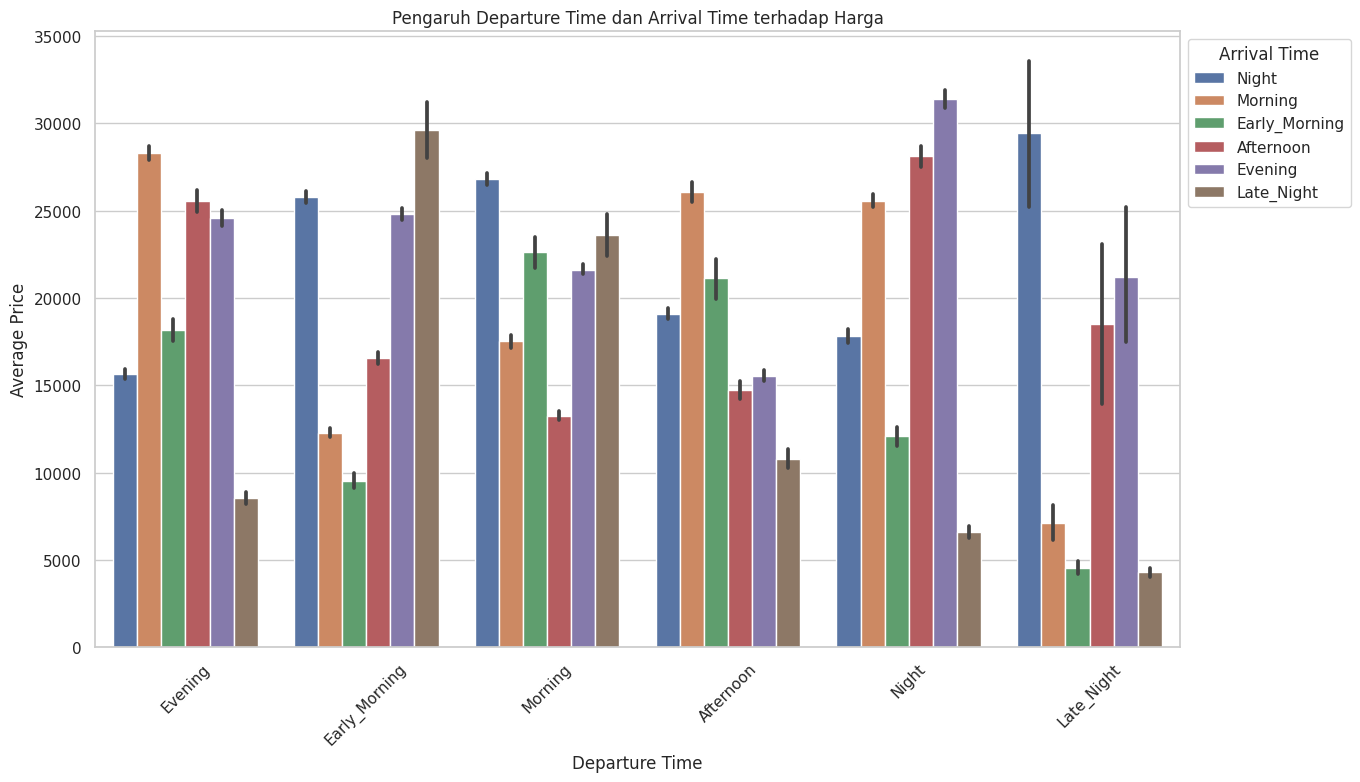

In [ ]:
plt.figure(figsize=(14, 8))
sns.barplot(x='departure_time', y='price', hue='arrival_time', data=df)
plt.title('Pengaruh Departure Time dan Arrival Time terhadap Harga')
plt.xlabel('Departure Time')
plt.ylabel('Average Price')
plt.legend(title='Arrival Time', bbox_to_anchor=(1, 1), loc='upper left')
plt.xticks(rotation=45)
plt.show()

**Observasi :**

Berdasarkan plot diatas dapat dilihat bahwa:

Pada `departure_time` Night dan `arrival_time` Evening memiliki harga yang lebih tinggi yaitu hampir mencapai 32000. Hal ini juga dipengaruhi oleh durasi perjalanan yang mana dari Night ke Evening yaitu hampir mencapai 24 jam. Selain itu dapat dilihat juga bahwa jika dibandingkan satu per satu yaitu `departure_time` dan `arrival_time` dimana jika sudah mulai bertolak belakang (semakin bertambah waktunya) dengan waktu `departure_time` nya maka harga akan semakin naik, misalnya `departure_time` Evening akan naik harga tiketnya jika `arrival_time` nya Morning, Early_Morning, Afternoon, dan Evening kembali.

Sehingga dapat dilihat bahwa durasi yang mempengaruhi naiknya harga tiket.

### Analyzed Price based on Duration + Stops

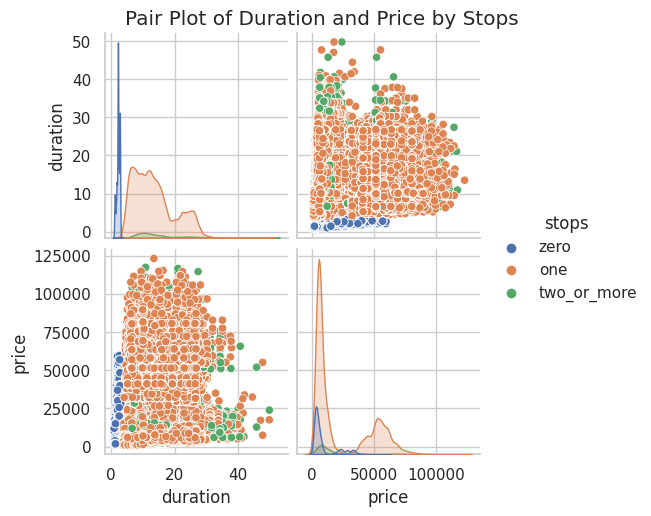

In [ ]:
sns.pairplot(df, hue='stops', vars=['duration', 'price'])
plt.suptitle('Pair Plot of Duration and Price by Stops', y=1.02)
plt.show()

**Observasi:**

Berdasarkan plot diatas dapat dilihat bahwa:

Harga yang paling tinggi yaitu mencapai 100000 adalah penerbangan dengan transit satu kali dengan durasi perjalanan rata-rata 5 jam hingga 18 jam. Hal ini kemungkinan dipengaruhi dengan Class penerbangan atau rata-rata perjalanan yang diambil calon penumpang adalah antar kota India yang yang tidak terlalu jauh sehingga mengindikasikan harga yang tinggi karena permintaan yang tinggi.

### Analyzed Price based on Days Left per Class

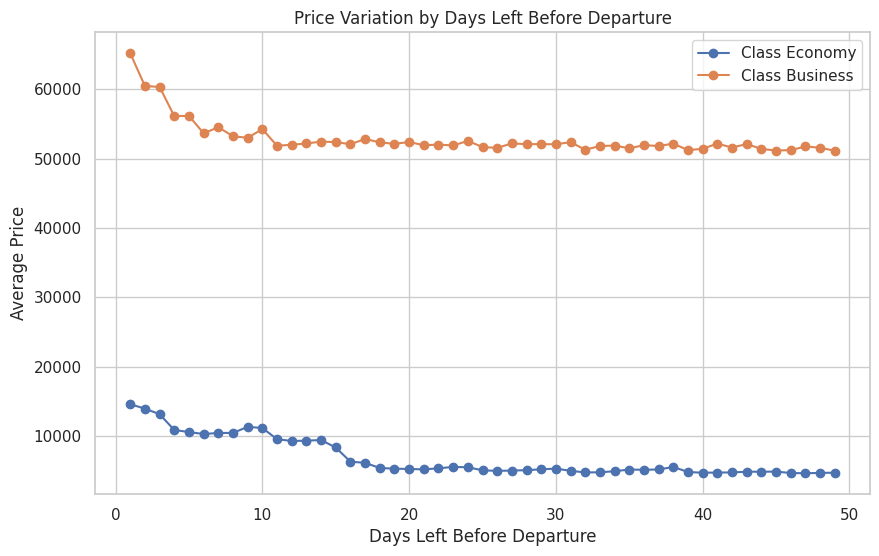

In [ ]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

for flight_class in df['class'].unique():
    class_data = df[df['class'] == flight_class]
    average_price_by_days_left = class_data.groupby('days_left')['price'].mean()
    plt.plot(average_price_by_days_left.index, average_price_by_days_left.values, marker='o', label=f'Class {flight_class}')

plt.xlabel('Days Left Before Departure')
plt.ylabel('Average Price')
plt.title('Price Variation by Days Left Before Departure')
plt.legend()
plt.grid(True)
plt.show()

**Observasi :**

Dapat dilihat bahwa dari rentang `days_left` 0 - 50 hari, dimana pada `days_left` 50 - 18 pada Class Economy dan `days_left` 50 - 11 hari pada class Business harga tiket masih pada range yang lonjakannya sangat rendah. Namun pada class Economy terjadi lonjakan pada `days_left` 17 hingga di hari ke 1 yang cukup tinggi. Sementara pada class Business terjadi lonjakan yang sangat tinggi dan cukup tajam dari `days_left` ke 10 hingga ke 1.

## Multicolinearity

### Heatmap Correlation

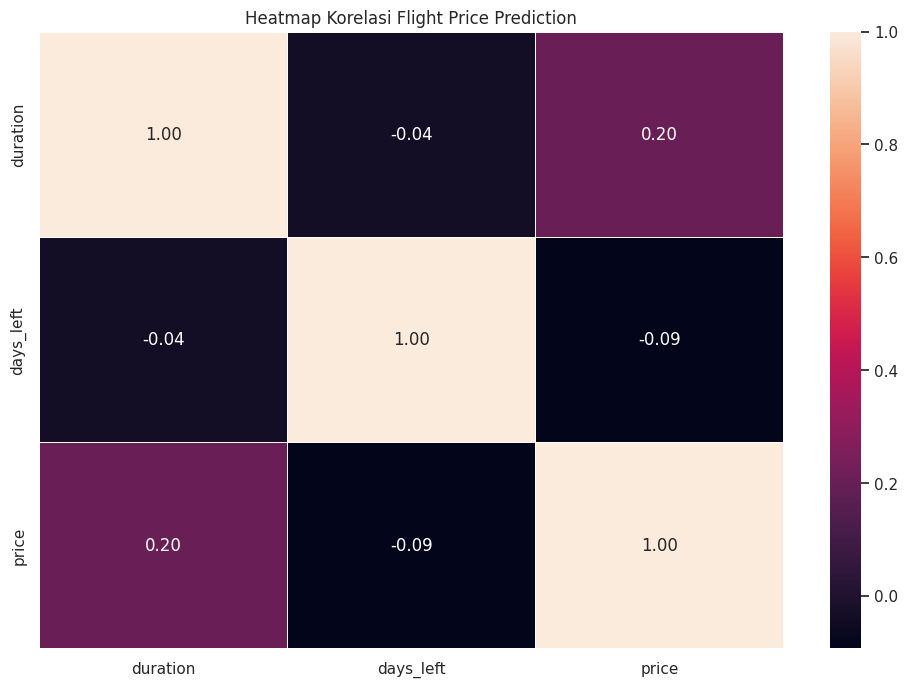

In [ ]:
# Menghitung matriks korelasi
correlation_matrix = df.corr()

# Membuat heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", linewidths=.5)
plt.title('Heatmap Korelasi Flight Price Prediction')
plt.show()

**Observasi**

Pada heatmeap correlation ini untuk melihat korelasi antara fitur-fitur numerik dapat dilihat bahwa tidak ada korelasi yang begitu tinggi diantara fitur-fiturnya. Namun dapat dilihat `price` dan `duration` cukup memiliki korelasi yang ditunjukkan oleh heatmap ini walaupun terbilang masih rendah.

### Pairplot

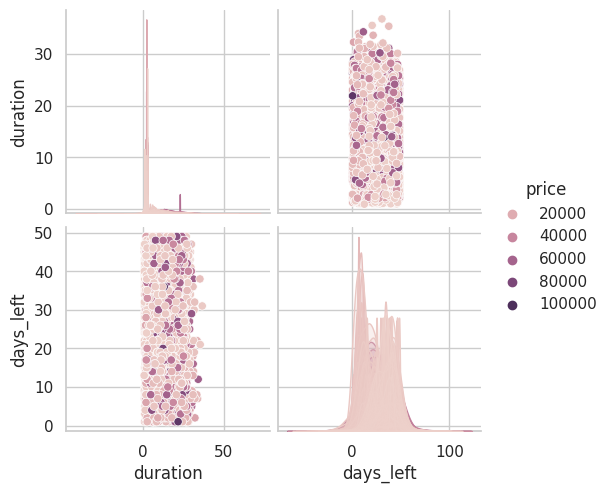

In [ ]:
sns.pairplot(df.sample(5000, random_state=42), hue='price')

**Observasi:**

Berdasarkan plot diatas dapat lihat bahwa

1. Harga tiket booking yang paling banyak pada data ini adalah didominasi dengan harga 20000.
2. Durasi penerbangan yang ditempuh pada harga tiket ini dapat mencapai hingga 0 - 38 jam.
3. Rata-rata `days_left` (sisa hari) sebelum penerbangan pada harga tiket ini didominasi dengan pembookingan rata-rata 20 hari dan yang paling lama yaitu hampir 2 bulan (mencapai 50 hari). Hal ini juga mungkin bisa jadi penyebab harga tiket menjadi murah.
4. Dapat dilihat juga bahwa `duration` dan 'days_left' cukup memiliki korelasi jika dilihat dari plot ini.

# Feature Engineering

## Categorical Encoding

### One-Hot Encoder

In [ ]:
flight = df.copy()

In [ ]:
from sklearn.preprocessing import OneHotEncoder

source_city_encoder = OneHotEncoder(drop='first',sparse_output=False,max_categories=10,dtype=np.int64)
source_city_encoded = source_city_encoder.fit_transform(df[['source_city']])
source_city_encoded = pd.DataFrame(source_city_encoded,columns=source_city_encoder.get_feature_names_out())
source_city_encoded

,source_city_Chennai,source_city_Delhi,source_city_Hyderabad,source_city_Kolkata,source_city_Mumbai
0,0,1,0,0,0
1,0,1,0,0,0
2,0,1,0,0,0
3,0,1,0,0,0
4,0,1,0,0,0
...,...,...,...,...,...
300148,1,0,0,0,0
300149,1,0,0,0,0
300150,1,0,0,0,0
300151,1,0,0,0,0


In [ ]:
flight = pd.concat([flight,source_city_encoded],axis=1)
flight.head()

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,source_city_Chennai,source_city_Delhi,source_city_Hyderabad,source_city_Kolkata,source_city_Mumbai
0,SpiceJet,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953,0,1,0,0,0
1,SpiceJet,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953,0,1,0,0,0
2,AirAsia,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956,0,1,0,0,0
3,Vistara,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955,0,1,0,0,0
4,Vistara,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955,0,1,0,0,0


In [ ]:
destination_city_encoder = OneHotEncoder(drop='first',sparse_output = False,max_categories = 10,dtype = np.int64)
destination_city_encoded = destination_city_encoder.fit_transform(df[['destination_city']])
destination_city_encoded = pd.DataFrame(destination_city_encoded,columns = destination_city_encoder.get_feature_names_out())
destination_city_encoded

,destination_city_Chennai,destination_city_Delhi,destination_city_Hyderabad,destination_city_Kolkata,destination_city_Mumbai
0,0,0,0,0,1
1,0,0,0,0,1
2,0,0,0,0,1
3,0,0,0,0,1
4,0,0,0,0,1
...,...,...,...,...,...
300148,0,0,1,0,0
300149,0,0,1,0,0
300150,0,0,1,0,0
300151,0,0,1,0,0


In [ ]:
flight = pd.concat([flight,destination_city_encoded],axis=1)
flight.head()

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,source_city_Chennai,source_city_Delhi,source_city_Hyderabad,source_city_Kolkata,source_city_Mumbai,destination_city_Chennai,destination_city_Delhi,destination_city_Hyderabad,destination_city_Kolkata,destination_city_Mumbai
0,SpiceJet,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953,0,1,0,0,0,0,0,0,0,1
1,SpiceJet,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953,0,1,0,0,0,0,0,0,0,1
2,AirAsia,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956,0,1,0,0,0,0,0,0,0,1
3,Vistara,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955,0,1,0,0,0,0,0,0,0,1
4,Vistara,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955,0,1,0,0,0,0,0,0,0,1


In [ ]:
airlines_encoder = OneHotEncoder(drop='first',sparse_output=False,dtype=np.int64,max_categories=10)
airlines_encoded = airlines_encoder.fit_transform(df[['airline']])
airlines_encoded = pd.DataFrame(airlines_encoded,columns=airlines_encoder.get_feature_names_out())
airlines_encoded.head()

,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,airline_Vistara
0,0,0,0,1,0
1,0,0,0,1,0
2,0,0,0,0,0
3,0,0,0,0,1
4,0,0,0,0,1


In [ ]:
flight = pd.concat([flight,airlines_encoded],axis=1)
flight.head()

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,...,destination_city_Chennai,destination_city_Delhi,destination_city_Hyderabad,destination_city_Kolkata,destination_city_Mumbai,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,airline_Vistara
0,SpiceJet,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953,...,0,0,0,0,1,0,0,0,1,0
1,SpiceJet,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953,...,0,0,0,0,1,0,0,0,1,0
2,AirAsia,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956,...,0,0,0,0,1,0,0,0,0,0
3,Vistara,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955,...,0,0,0,0,1,0,0,0,0,1
4,Vistara,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955,...,0,0,0,0,1,0,0,0,0,1


In [ ]:
flight.drop(['source_city','destination_city','airline'],axis=1,inplace=True)

### Ordinal Encoding

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encode = OrdinalEncoder(categories=[['zero','one','two_or_more'],['Early_Morning','Morning','Afternoon','Evening','Night','Late_Night'],['Early_Morning','Morning','Afternoon','Evening','Night','Late_Night'],['Economy','Business']])
flight[['stops','arrival_time','departure_time','class']] = ordinal_encode.fit_transform(flight[['stops','arrival_time','departure_time','class']])
flight.head()

,departure_time,stops,arrival_time,class,duration,days_left,price,source_city_Chennai,source_city_Delhi,source_city_Hyderabad,...,destination_city_Chennai,destination_city_Delhi,destination_city_Hyderabad,destination_city_Kolkata,destination_city_Mumbai,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,airline_Vistara
0,3.0,0.0,4.0,0.0,2.17,1,5953,0,1,0,...,0,0,0,0,1,0,0,0,1,0
1,0.0,0.0,1.0,0.0,2.33,1,5953,0,1,0,...,0,0,0,0,1,0,0,0,1,0
2,0.0,0.0,0.0,0.0,2.17,1,5956,0,1,0,...,0,0,0,0,1,0,0,0,0,0
3,1.0,0.0,2.0,0.0,2.25,1,5955,0,1,0,...,0,0,0,0,1,0,0,0,0,1
4,1.0,0.0,1.0,0.0,2.33,1,5955,0,1,0,...,0,0,0,0,1,0,0,0,0,1


In [ ]:
flight.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 22 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   departure_time              300153 non-null  float64
 1   stops                       300153 non-null  float64
 2   arrival_time                300153 non-null  float64
 3   class                       300153 non-null  float64
 4   duration                    300153 non-null  float64
 5   days_left                   300153 non-null  int64  
 6   price                       300153 non-null  int64  
 7   source_city_Chennai         300153 non-null  int64  
 8   source_city_Delhi           300153 non-null  int64  
 9   source_city_Hyderabad       300153 non-null  int64  
 10  source_city_Kolkata         300153 non-null  int64  
 11  source_city_Mumbai          300153 non-null  int64  
 12  destination_city_Chennai    300153 non-null  int64  
 13  destination_ci

# Deep-Exploration

## Is there an interaction between the number of stops, departure time, and flight duration that affects ticket prices simultaneously?

<Figure size 800x600 with 0 Axes>

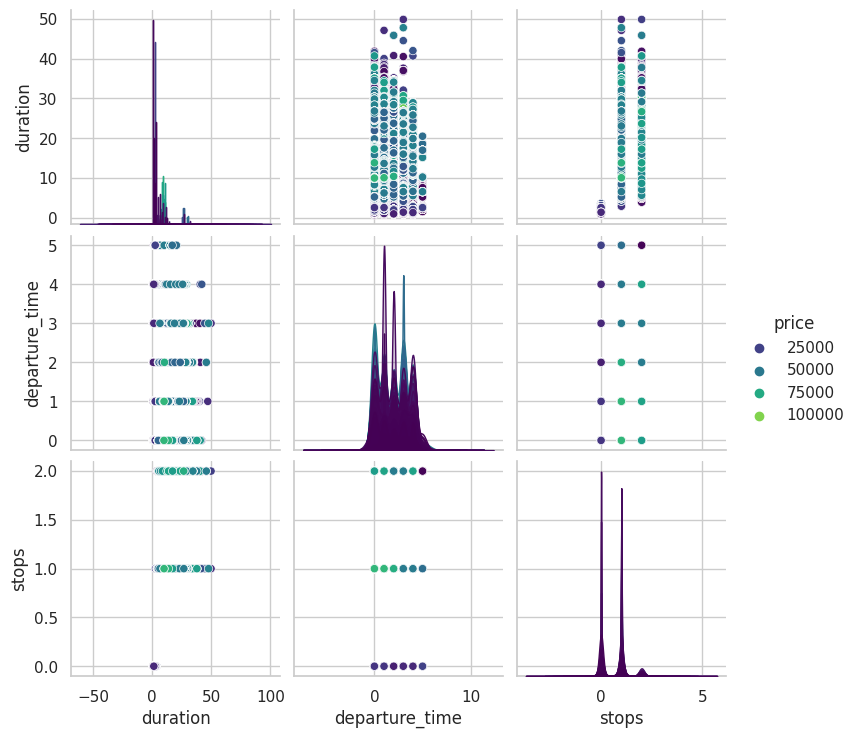

In [ ]:
plt.figure(figsize=(8, 6))
sns.pairplot(flight, vars=['duration', 'departure_time', 'stops'], hue='price', palette='viridis', diag_kind='kde')
plt.show()

**Observasi**

Dapat dilihat bahwa:

Interaksi antara durasi perjalanan (duration), waktu keberangkatan (departure_time), dan jumlah transit (stops), dapat disimpulkan:

1. Durasi perjalanan yang lebih lama cenderung memiliki harga tiket yang lebih rendah, ditandai dengan warna yang lebih gelap.
2. Waktu keberangkatan pada periode Early_Morning, Morning, Afternoon, dan Evening cenderung terkait dengan harga tiket yang lebih tinggi, terutama di Evening.
3.  Jumlah transit, terutama dengan satu atau lebih transit, dapat berpengaruh pada harga tiket, dan ini juga terkait dengan durasi perjalanan yang lebih lama.

Jadi, secara umum, durasi perjalanan, waktu keberangkatan, dan jumlah transit bersama-sama dapat memberikan indikasi tentang tingkat harga tiket penerbangan. Durasi perjalanan yang lebih lama dan waktu keberangkatan pada periode tertentu dapat berkontribusi pada harga tiket yang lebih rendah, sementara jumlah transit juga dapat mempengaruhi harga tiket.

# Data Processing

## Outliers Handling

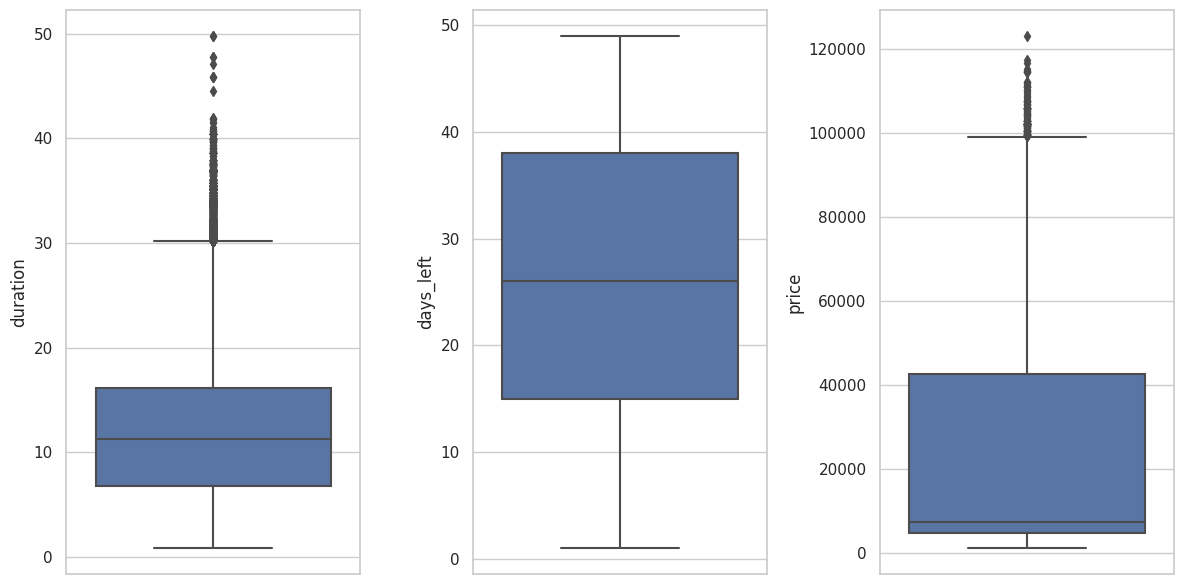

In [ ]:
#Menggunakan boxplot untuk melihat outliers

plt.figure(figsize=(12,6))

for i in range(0, len(numerical_columns)):
    plt.subplot(1, len(numerical_columns), i+1)
    sns.boxplot(y=df[numerical_columns[i]])
    plt.tight_layout()

**Observasi:**

Dapat dilihat bahwa `duration` dan `price` memiliki outliers.

###IQR for Outliers Handling

In [ ]:
print(f'Sebelum outlier handling: {len(df)}')
columns = ['duration', 'price']
outliers_handling = np.array([True] * len(df))

for col in columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - (IQR * 1.5)
    upper_bound = Q3 + (IQR * 1.5)

    outliers_handling = ((df[col] >= lower_bound) & (df[col] <= upper_bound)) & outliers_handling

df = df[outliers_handling].reset_index(drop=True)

print('Setelah outlier handling:', len(df))

Sebelum outlier handling: 300153
Setelah outlier handling: 297920


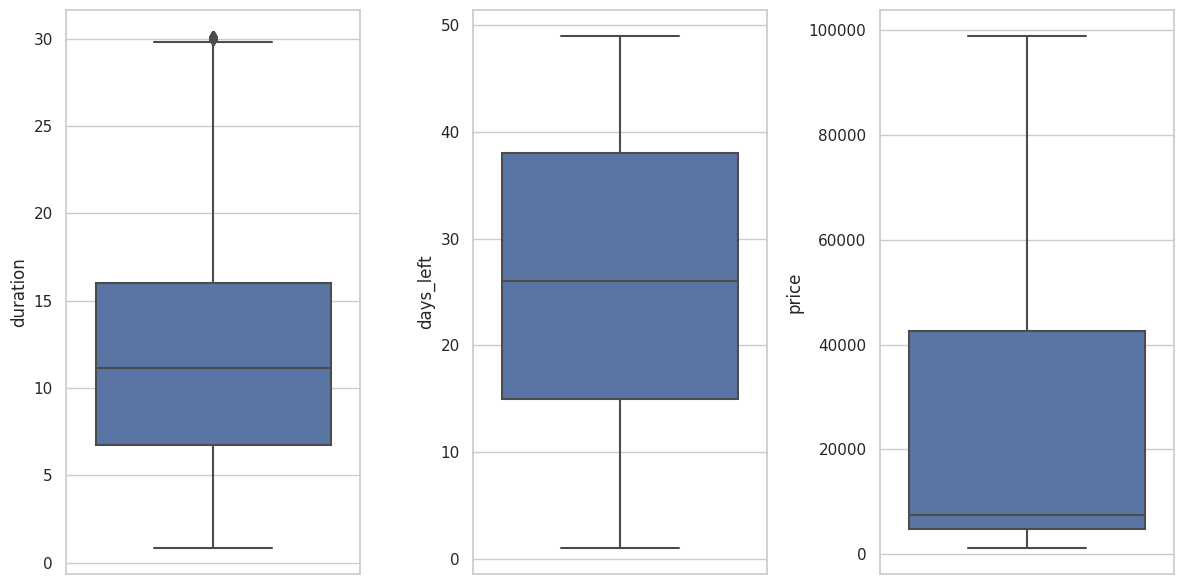

In [ ]:
#Setelah penanganan outliers

plt.figure(figsize=(12,6))

for i in range(0, len(numerical_columns)):
    plt.subplot(1, len(numerical_columns), i+1)
    sns.boxplot(y=df[numerical_columns[i]])
    plt.tight_layout()

**Observasi:**

Dapat dilihat bahwa `duration` dan `price` memiliki outliers kemudian dilakukan outliers handling, dari 300153 menjadi 297920 dimana ini berarti persentase berkurangnya hanya 0.74%.. Plot diatas dapat dilihat bahwa outliers masih ada namun kecil dibandingkan sebelum outliers handling.

# Feature Scalling

In [ ]:
# (COBA) Menggunakan Standardization

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
flight[numerical_columns] = scaler.fit_transform(flight[numerical_columns])
flight.head()

,departure_time,stops,arrival_time,class,duration,days_left,price,source_city_Chennai,source_city_Delhi,source_city_Hyderabad,...,destination_city_Chennai,destination_city_Delhi,destination_city_Hyderabad,destination_city_Kolkata,destination_city_Mumbai,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,airline_Vistara
0,3.0,0.0,4.0,0.0,-1.397531,-1.843875,-0.658068,0,1,0,...,0,0,0,0,1,0,0,0,1,0
1,0.0,0.0,1.0,0.0,-1.375284,-1.843875,-0.658068,0,1,0,...,0,0,0,0,1,0,0,0,1,0
2,0.0,0.0,0.0,0.0,-1.397531,-1.843875,-0.657936,0,1,0,...,0,0,0,0,1,0,0,0,0,0
3,1.0,0.0,2.0,0.0,-1.386407,-1.843875,-0.657980,0,1,0,...,0,0,0,0,1,0,0,0,0,1
4,1.0,0.0,1.0,0.0,-1.375284,-1.843875,-0.657980,0,1,0,...,0,0,0,0,1,0,0,0,0,1


# Split Data

In [ ]:
from sklearn.model_selection import train_test_split

feature = flight.drop(columns='price')
target = flight[['price']]

feature_flight_pretrain, feature_flight_test, target_flight_pretrain, target_flight_test = train_test_split(feature, target, test_size=0.20, random_state=42)

feature_flight_train, feature_flight_validation, target_flight_train, target_flight_validation = train_test_split(feature_flight_pretrain, target_flight_pretrain, test_size=0.20, random_state=42)

# Multicolinearity Checking

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
from statsmodels.tools.tools import add_constant

X = add_constant(feature_flight_train)

vif_flight = pd.DataFrame([vif(X.values, i)
               for i in range(X.shape[1])],
              index=X.columns).reset_index()
vif_flight.columns = ['feature','vif_score']
vif_flight = vif_flight.loc[vif_flight.feature!='const']
vif_flight

,feature,vif_score
1,departure_time,1.055574
2,stops,1.389932
3,arrival_time,1.047218
4,class,1.262385
5,duration,1.727318
6,days_left,1.004058
7,source_city_Chennai,1.560759
8,source_city_Delhi,1.875976
9,source_city_Hyderabad,1.603277
10,source_city_Kolkata,1.682970


**Observasi**

Dapat dilihat bahwa`airline_Vistara`. Mari kita lihat apakah `airline_Vistara` berdampak korelasi tinggi pada heatmap atau tidak.

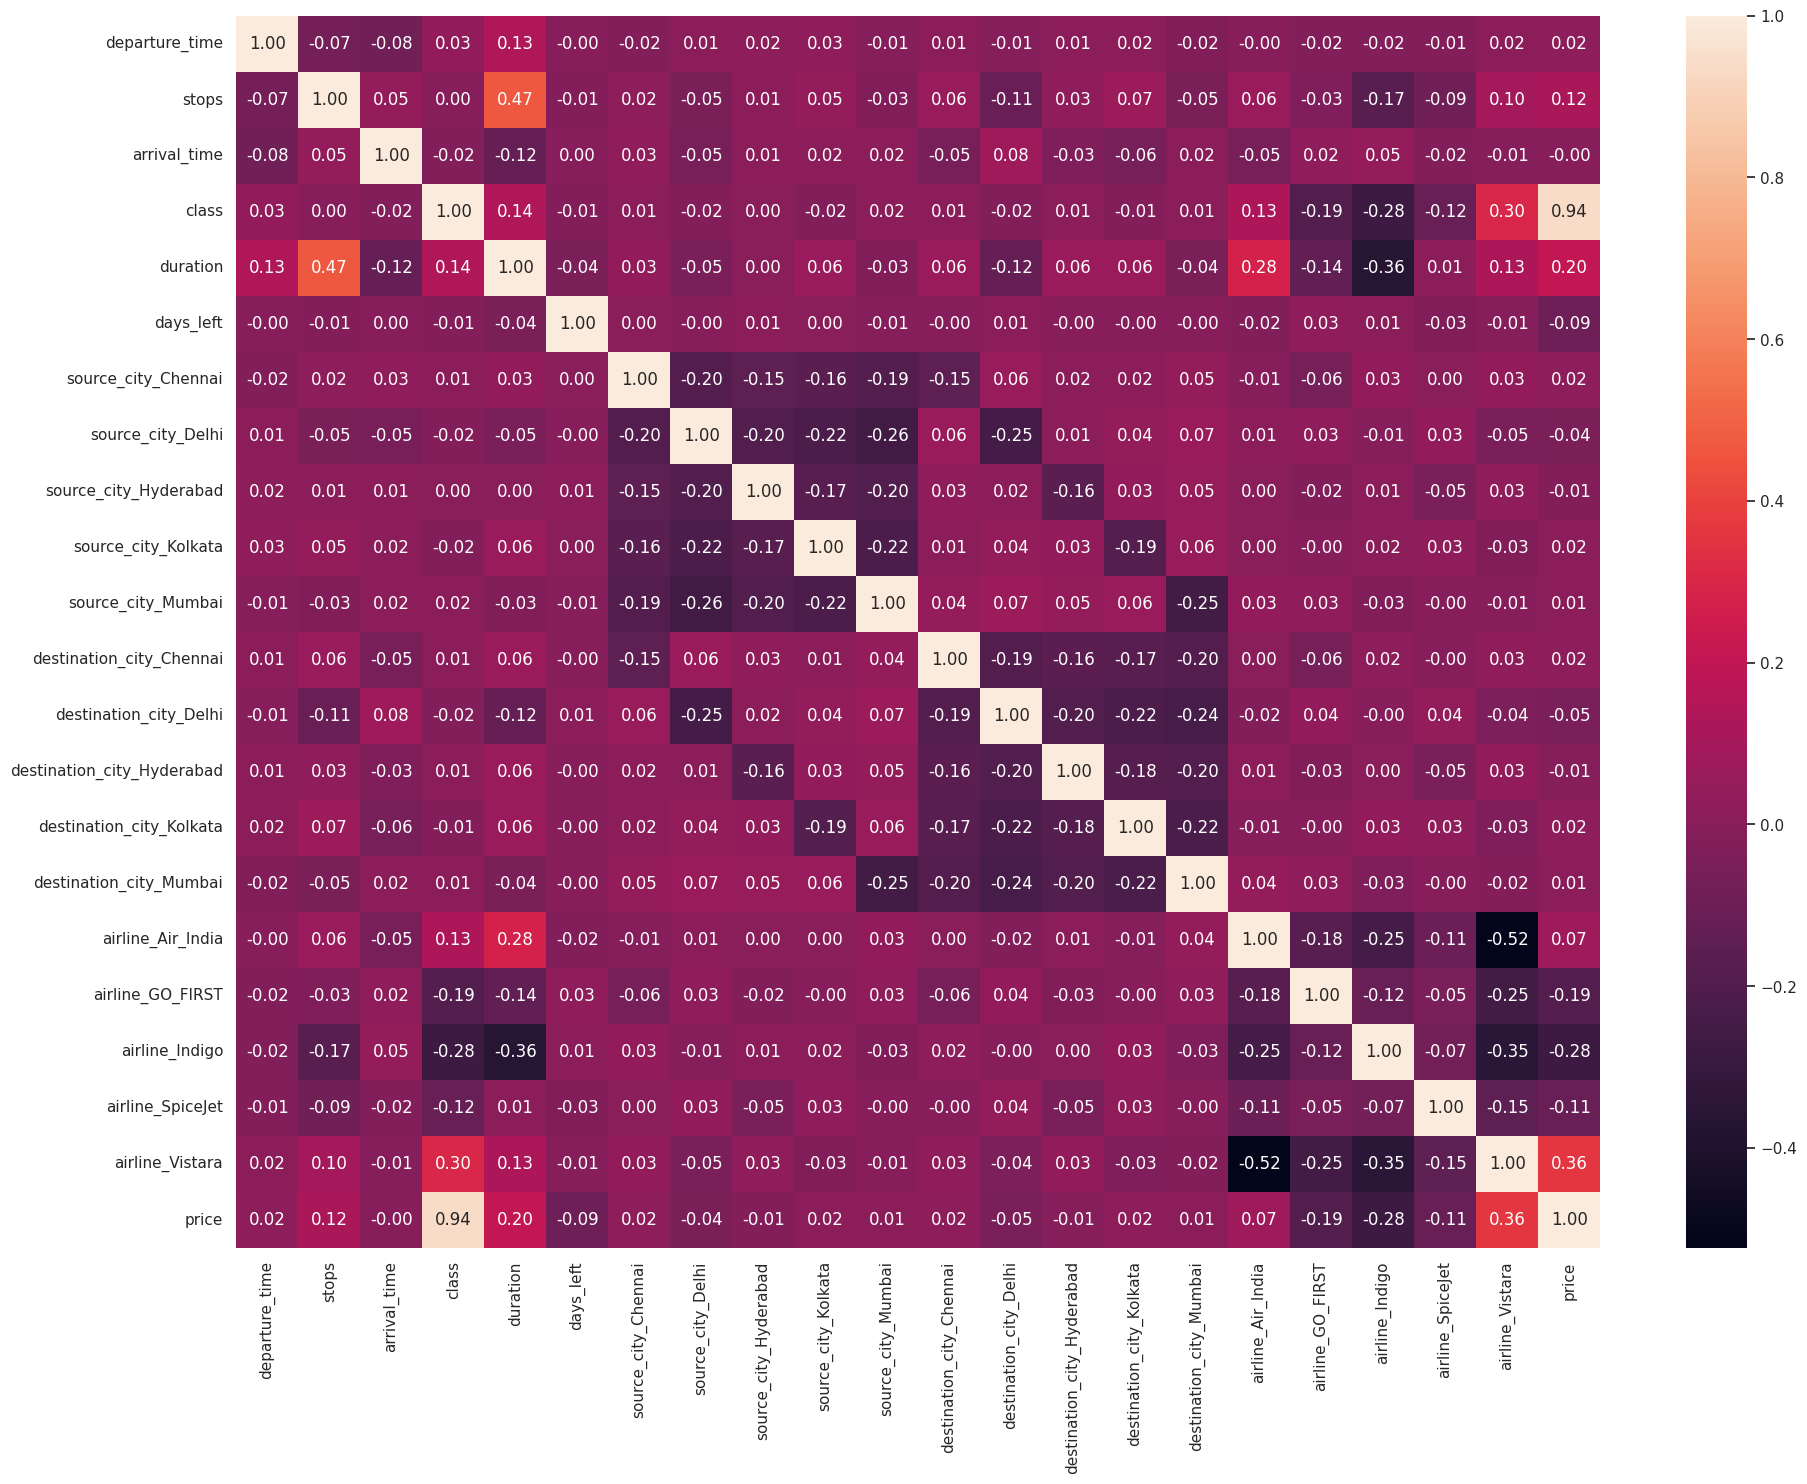

In [ ]:
# heatmap correlation
flight_train = pd.concat([feature_flight_train, target_flight_train], axis=1)
corr = flight_train.corr()

plt.figure(figsize=(22,16))
sns.heatmap(corr, annot=True, fmt='.2f')
plt.show()

**Observasi:**

Dapat dilihat menggunakan heatmap bahwa tidak ada fitur yang saling berkolerasi yang terlalu tinggi. Hanya ada `class` yang kemungkinan disebabkan oleh variabelnya satu sama lain. Namun disini dapat dilihat bahwa `duration` dan `stops` memiliki korelasi yang lumayan tinggi yaitu 0.47 namun akan dicoba untuk tidak didrop terlebih dahulu karena berdasarkan EDA bahwa `duration` dan `stops` memiliki pengaruh terhadap harga.  Sehingga tidak perlu didrop feature apapun.

#Modelling

# Baseline

In [ ]:
feature_flight_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 192097 entries, 252796 to 230109
Data columns (total 21 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   departure_time              192097 non-null  float64
 1   stops                       192097 non-null  float64
 2   arrival_time                192097 non-null  float64
 3   class                       192097 non-null  float64
 4   duration                    192097 non-null  float64
 5   days_left                   192097 non-null  float64
 6   source_city_Chennai         192097 non-null  int64  
 7   source_city_Delhi           192097 non-null  int64  
 8   source_city_Hyderabad       192097 non-null  int64  
 9   source_city_Kolkata         192097 non-null  int64  
 10  source_city_Mumbai          192097 non-null  int64  
 11  destination_city_Chennai    192097 non-null  int64  
 12  destination_city_Delhi      192097 non-null  int64  
 13  destinati

## Train & Evaluate Model

In [ ]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_percentage_error
import gc

In [ ]:
nama_models = []
r2_scores = []
mape_scores = []
rmse_scores = []

In [ ]:
def flight_train_evaluate_model(model):
    model.fit(feature_flight_train,target_flight_train)
    target_flight_pred = model.predict(feature_flight_test)
    r2 = r2_score(target_flight_test,target_flight_pred)
    rmse = mean_squared_error(target_flight_test,target_flight_pred,squared=False)
    mape = mean_absolute_percentage_error(target_flight_test,target_flight_pred)
    print("R2 Score:",r2)
    print("RMSE:",rmse)
    print("MAPE:",mape)
    nama_models.append(model)
    r2_scores.append(r2)
    mape_scores.append(mape)
    rmse_scores.append(rmse)
    gc.collect()

In [ ]:
flight_train_evaluate_model(LinearRegression())

R2 Score: 0.9095958105245183
RMSE: 0.3007590670758951
MAPE: 0.9422962853444692


In [ ]:
flight_train_evaluate_model(Lasso())

R2 Score: -1.2242980695909012e-07
RMSE: 1.000286660379375
MAPE: 0.9997895549822494


In [ ]:
flight_train_evaluate_model(Ridge())

R2 Score: 0.9095958572748153
RMSE: 0.3007589893108182
MAPE: 0.9422740269010187


In [ ]:
flight_train_evaluate_model(KNeighborsRegressor())

R2 Score: 0.9688737367558664
RMSE: 0.1764769314154165
MAPE: 0.21010940499886108


In [ ]:
flight_train_evaluate_model(RandomForestRegressor())

R2 Score: 0.9842171334930897
RMSE: 0.125665884453396
MAPE: 0.14843330573581093


In [ ]:
flight_train_evaluate_model(DecisionTreeRegressor())

R2 Score: 0.9746778798597292
RMSE: 0.15917486238809028
MAPE: 0.15736610797290693


In [ ]:
flight_train_evaluate_model(XGBRegressor())

R2 Score: 0.9746339281758255
RMSE: 0.159312942653168
MAPE: 0.2230472605171872


In [ ]:
model_performace = pd.DataFrame({'model': nama_models, 'r2': r2_scores, 'rmse': rmse_scores, 'mape': mape_scores}).sort_values('r2',ascending=False).reset_index()
model_performace

,index,model,r2,rmse,mape
0,4,"(DecisionTreeRegressor(max_features=1.0, rando...",9.842171e-01,0.125666,0.148433
1,5,DecisionTreeRegressor(),9.746779e-01,0.159175,0.157366
2,6,"XGBRegressor(base_score=None, booster=None, ca...",9.746339e-01,0.159313,0.223047
3,3,KNeighborsRegressor(),9.688737e-01,0.176477,0.210109
4,2,Ridge(),9.095959e-01,0.300759,0.942274
5,0,LinearRegression(),9.095958e-01,0.300759,0.942296
6,1,Lasso(),-1.224298e-07,1.000287,0.999790


**Observasi:**

1. **DecisionTreeRegressor:**

- **R-squared (r2)**: Nilai tinggi, sekitar 0.984, menunjukkan bahwa model secara baik menjelaskan variasi dalam data.
- **RMSE**: Nilai rendah, sekitar 0.126, menandakan bahwa prediksi model memiliki kesalahan yang kecil.
- **MAPE**:Nilai rendah, sekitar 0.147, menunjukkan bahwa persentase kesalahan prediksi model juga kecil.


2. **XGBRegressor:**

- **R-squared (r2)**: Nilai tinggi, sekitar 0.975, menunjukkan kinerja yang baik dalam menjelaskan variasi dalam data.
- **RMSE:** Nilai rendah, sekitar 0.159, menandakan bahwa prediksi model memiliki kesalahan yang kecil.
- **MAPE:** Nilai rendah, sekitar 0.223, menunjukkan bahwa persentase kesalahan prediksi model juga kecil, meskipun lebih tinggi dibandingkan DecisionTreeRegressor.

3. **KNeighborsRegressor**:

- **R-squared (r2)**: Nilai tinggi, sekitar 0.969, menunjukkan bahwa model dengan baik menjelaskan variasi dalam data.
- **RMSE**: Nilai rendah, sekitar 0.176, menandakan bahwa prediksi model memiliki kesalahan yang kecil.
- **MAPE**: Nilai rendah, sekitar 0.210, menunjukkan bahwa persentase kesalahan prediksi model juga kecil.

# Hyperparameter Tuning

Melakukan Hyperparamete

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

dct_reg = DecisionTreeRegressor()

parameters = {'criterion': ['squared_error', 'friedman_mse', 'poisson'],
              'splitter': ['best', 'random'],
              'max_features': ['sqrt', 'log2']
             }

dct_reg_grid = RandomizedSearchCV(dct_reg, parameters, cv=5)

flight_train_evaluate_model(dct_reg_grid)

R2 Score: 0.9685274318298163
RMSE: 0.17745594038433804
MAPE: 0.17329790042508797


In [ ]:
dct_reg_grid.best_score_

0.9667091933586114

In [ ]:
dct_reg_grid.best_params_

{'splitter': 'best', 'max_features': 'log2', 'criterion': 'friedman_mse'}

In [ ]:
import warnings
warnings.filterwarnings('ignore')

xgb_reg = XGBRegressor()

parameters = {
    'objective': ['reg:squarederror', 'reg:huber', 'reg:quantile'],
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.2, 0.4, 0.8, 1],
    'colsample_bytree': [0.8, 0.9, 1.0]
}
xgb_reg_grid = RandomizedSearchCV(xgb_reg, parameters, cv=5)

flight_train_evaluate_model(xgb_reg_grid)

R2 Score: 0.9798998173131527
RMSE: 0.1418157456994108
MAPE: 0.2208052979757456


In [ ]:
xgb_reg_grid.best_score_

0.981561306744932

In [ ]:
xgb_reg_grid.best_params_

{'n_estimators': 150,
 'max_features': 'log2',
 'loss': 'huber',
 'learning_rate': 0.8}

In [ ]:
knn_reg = KNeighborsRegressor()

parameters = {
    'n_neighbors': [2,8,12,20],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}
knn_reg_grid = RandomizedSearchCV(knn_reg, parameters, cv=5)

flight_train_evaluate_model(knn_reg_grid)

R2 Score: 0.9722952786087885
RMSE: 0.1664950568812324
MAPE: 0.20035525631051881


In [ ]:
knn_reg_grid.best_score_

0.9714224902318559

In [ ]:
knn_reg_grid.best_params_

{'weights': 'distance', 'p': 1, 'n_neighbors': 8}

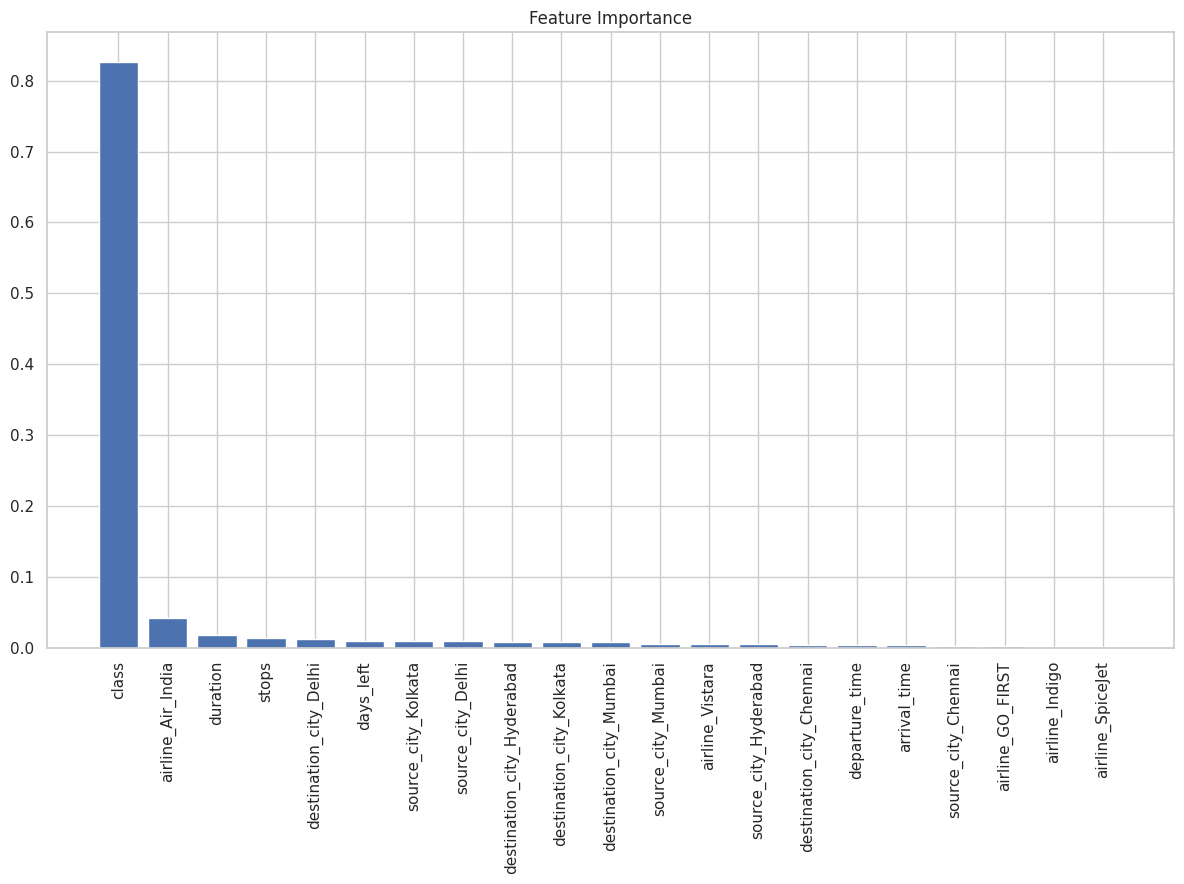

In [ ]:
from sklearn.inspection import permutation_importance
importances = xgb_reg_grid.best_estimator_.feature_importances_

sorted_indices = np.argsort(importances)[::-1]

plt.figure(figsize=(12, 9))
plt.title('Feature Importance')
plt.bar(range(feature_flight_train.shape[1]), importances[sorted_indices], align='center')
plt.xticks(range(feature_flight_train.shape[1]), feature_flight_train.columns[sorted_indices], rotation=90)
plt.tight_layout()
plt.show()

**Result:**

1. **Decision Tree**:
- R2 Score: 0.9685274318298163
- RMSE: 0.17745594038433804
- MAPE: 0.17329790042508797
- Best_score: 0.9667091933586114
- {'splitter': 'best', 'max_features': 'log2', 'criterion': 'friedman_mse'}

2. **XGboost**:
- R2 Score: 0.9798998173131527
- RMSE: 0.1418157456994108
- MAPE: 0.2208052979757456
- Best_score:0.981561306744932
- {'n_estimators': 150,
 'max_features': 'log2',
 'loss': 'huber',
 'learning_rate': 0.8}

3. **KNN**:
- R2 Score: 0.9722952786087885
- RMSE: 0.1664950568812324
- MAPE: 0.20035525631051881
- Best_score:0.9714224902318559
- {'weights': 'distance', 'p': 1, 'n_neighbors': 8}

# Conclusion

- Kelas maskapai sangat mempengaruhi harga.

- Asal kota dan kota tujuan juga mempengaruhi harga terutama jika maskapai asal kota memiliki demand misalnya pada kota Chennai yang merupakan kota tourist yang tinggi atau kota tujuan yang merupakan pusat kota seperti Bangalore. Sehingga jarak tidak selalu berkontribusi terhadap harga.

- Jadwal booking tiket mempengaruhi harga, semakin mepet booking tiket maka akan semakin mahal.

- Departure time mempengaruhi harga terutama diwaktu demand yang tinggi, dan di malam hari cenderung murah.

- Pada analisis ini, durasi terkadang mempengaruhi harga, namun terkadang juga tidak. Masih ambigu dan setelah modelling bahwa class sangat mempengaruhi harga.


Kesimpulannya, pemilihan maskapai, rute, dan waktu pemesanan yang tepat dapat membantu mendapatkan tiket dengan harga lebih baik.